# House Price Predictor 


Dataset Overview:
Missing values in each column:
Area_sqft     0
Bedrooms      0
Location      0
Price_Lakh    0
dtype: int64

Data types:
Area_sqft      int64
Bedrooms       int64
Location      object
Price_Lakh     int64
dtype: object

Dataset statistics:
Location encoding mapping:
Bangalore: 0
Chennai: 1
Delhi: 2
Mumbai: 3
Pune: 4
Feature set:


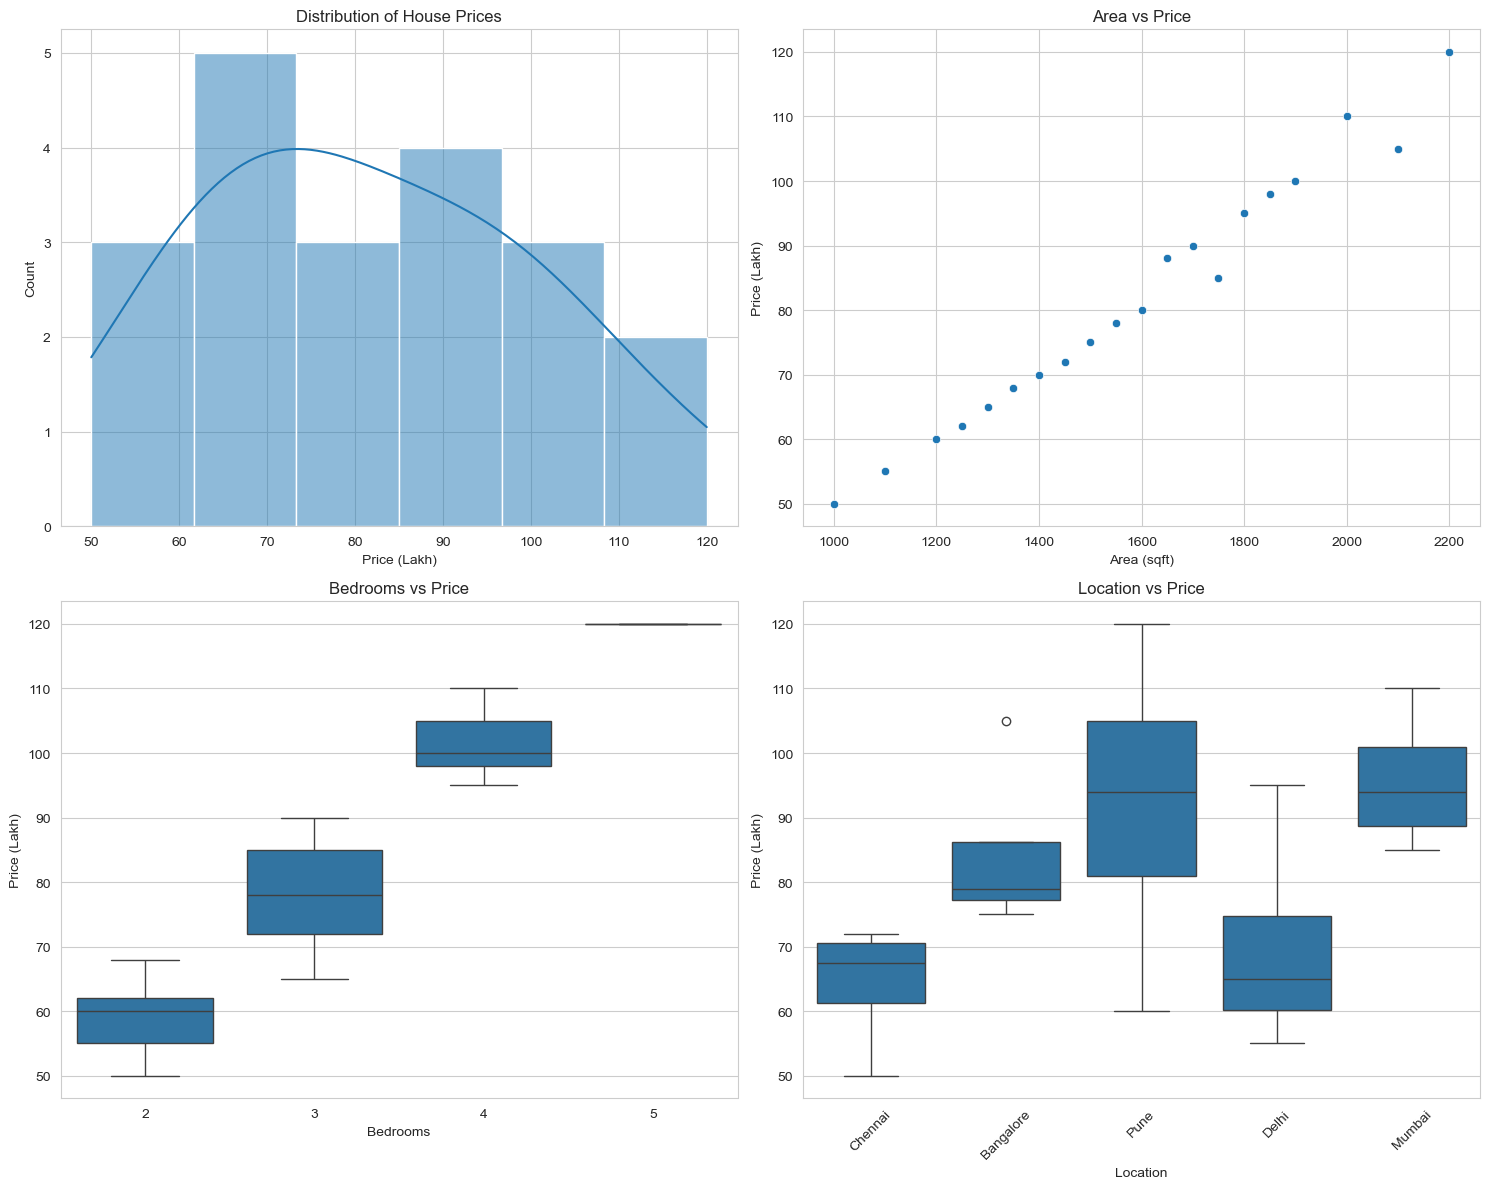

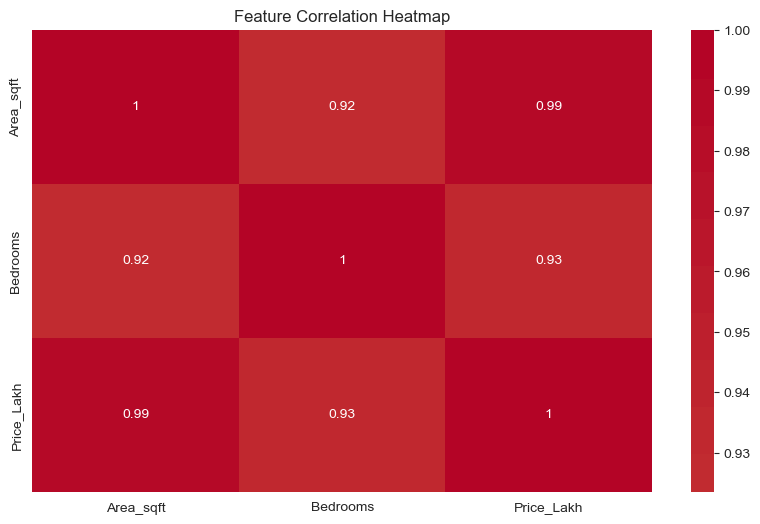

Training set size: 16
Testing set size: 4
Model Performance Comparison:


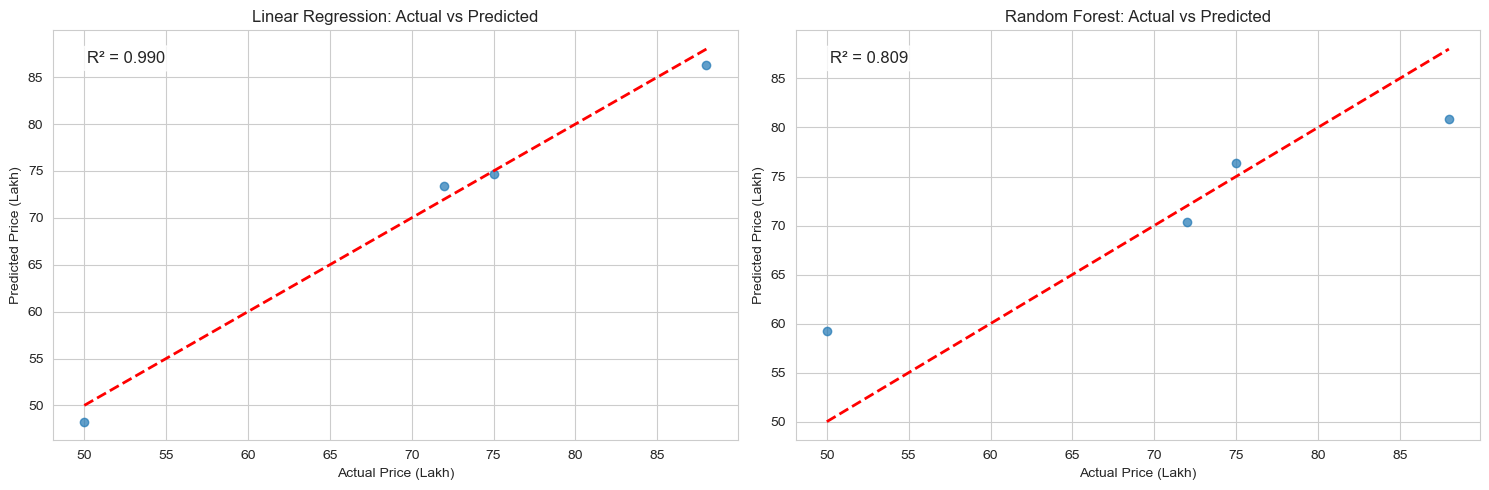

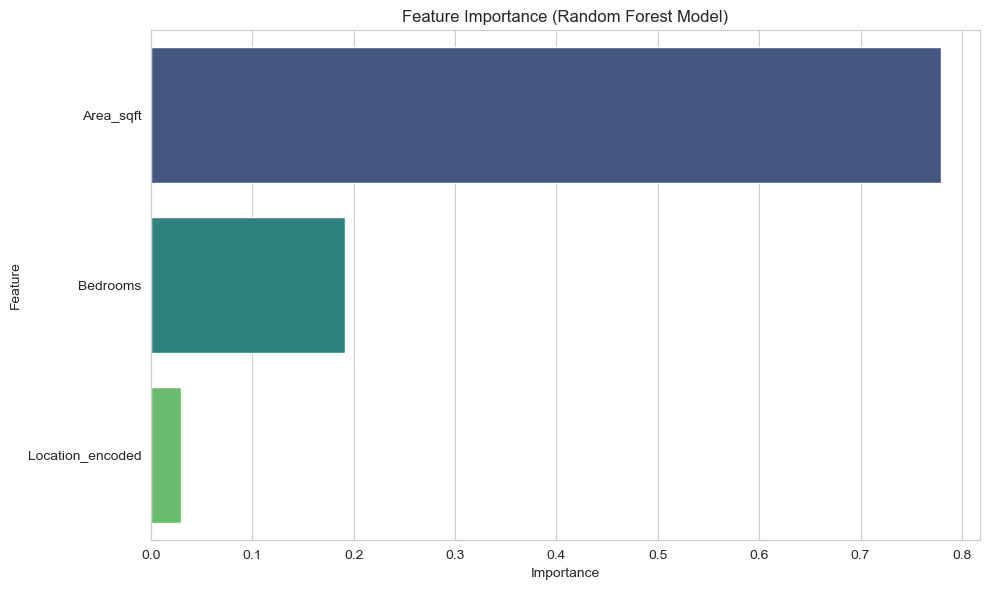

Prediction for Sample Input:
Area: 1300 sqft, Bedrooms: 3, Location: Chennai
Predicted House Price: 65.4 Lakh
Model Accuracy (R² Score): 0.81
Additional Test Cases:
Case 1: 1000 sqft, 2 BR, Chennai
Predicted Price: 59.29 Lakh
------------------------------
Case 2: 1500 sqft, 3 BR, Bangalore
Predicted Price: 76.42 Lakh
------------------------------
Case 3: 2000 sqft, 4 BR, Mumbai
Predicted Price: 105.9 Lakh
------------------------------
Case 4: 1200 sqft, 2 BR, Pune
Predicted Price: 60.49 Lakh
------------------------------
Case 5: 1800 sqft, 3 BR, Delhi
Predicted Price: 88.22 Lakh
------------------------------
Price Statistics by Location:
Average Price per Square Foot by Location:
Location
Pune         5262.76
Mumbai       5237.14
Delhi        5068.70
Bangalore    5008.06
Chennai      4991.38
Name: Price_per_sqft, dtype: float64


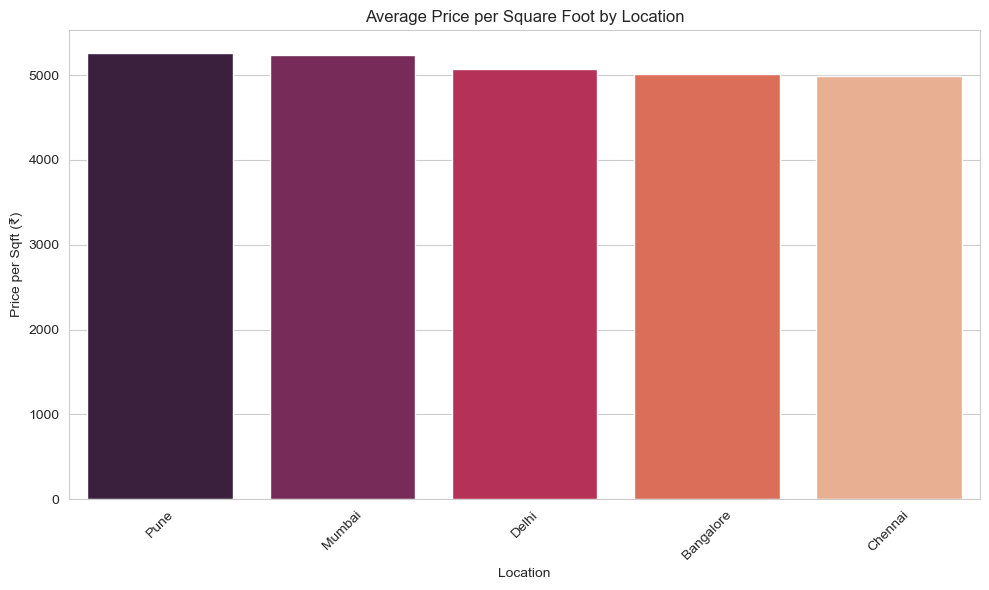

Model and encoder saved successfully!


In [1]:
# Data manipulation and analysis

import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

'''## Data Loading and Exploration'''

# Create sample dataset based on the problem statement

data = {
    'Area_sqft': [1000, 1500, 1200, 1800, 2000, 1300, 1600, 1900, 1100, 1700, 
                  1400, 2100, 2200, 1250, 1750, 1450, 1550, 1650, 1350, 1850],
    'Bedrooms': [2, 3, 2, 4, 4, 3, 3, 4, 2, 3, 3, 4, 5, 2, 3, 3, 3, 3, 2, 4],
    'Location': ['Chennai', 'Bangalore', 'Pune', 'Delhi', 'Mumbai', 
                 'Chennai', 'Bangalore', 'Pune', 'Delhi', 'Mumbai',
                 'Chennai', 'Bangalore', 'Pune', 'Delhi', 'Mumbai',
                 'Chennai', 'Bangalore', 'Pune', 'Delhi', 'Mumbai'],
    'Price_Lakh': [50, 75, 60, 95, 110, 65, 80, 100, 55, 90, 70, 105, 120, 62, 85, 72, 78, 88, 68, 98]
}

# Create DataFrame

df = pd.DataFrame(data)

# Display first few rows

print("Dataset Overview:")
df.head()

"""## Data Cleaning and Preprocessing"""

# Check for missing values

print("Missing values in each column:")
print(df.isnull().sum())

# Check data types

print("\nData types:")
print(df.dtypes)

# Basic statistics

print("\nDataset statistics:")
df.describe()

# Encode categorical variable (Location)

label_encoder = LabelEncoder()
df['Location_encoded'] = label_encoder.fit_transform(df['Location'])

# Display the mapping

print("Location encoding mapping:")
for i, location in enumerate(label_encoder.classes_):
    print(f"{location}: {i}")

# Prepare features and target

X = df[['Area_sqft', 'Bedrooms', 'Location_encoded']]
y = df['Price_Lakh']

# Display feature set

print("Feature set:")
X.head()

"""## Data Visualization"""

# Create subplots

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price distribution

sns.histplot(df['Price_Lakh'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of House Prices')
axes[0, 0].set_xlabel('Price (Lakh)')

# Area vs Price
sns.scatterplot(data=df, x='Area_sqft', y='Price_Lakh', ax=axes[0, 1])
axes[0, 1].set_title('Area vs Price')
axes[0, 1].set_xlabel('Area (sqft)')
axes[0, 1].set_ylabel('Price (Lakh)')

# Bedrooms vs Price
sns.boxplot(data=df, x='Bedrooms', y='Price_Lakh', ax=axes[1, 0])
axes[1, 0].set_title('Bedrooms vs Price')
axes[1, 0].set_xlabel('Bedrooms')
axes[1, 0].set_ylabel('Price (Lakh)')

# Location vs Price
sns.boxplot(data=df, x='Location', y='Price_Lakh', ax=axes[1, 1])
axes[1, 1].set_title('Location vs Price')
axes[1, 1].set_xlabel('Location')
axes[1, 1].set_ylabel('Price (Lakh)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Area_sqft', 'Bedrooms', 'Price_Lakh']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

"""## Model Training and Evaluation"""

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Linear Regression model
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

# Evaluate Random Forest model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Create a comparison DataFrame
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [lr_r2, rf_r2],
    'MSE': [lr_mse, rf_mse],
    'MAE': [lr_mae, rf_mae]
})

print("Model Performance Comparison:")
model_comparison

# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Actual vs Predicted for Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price (Lakh)')
axes[0].set_ylabel('Predicted Price (Lakh)')
axes[0].set_title('Linear Regression: Actual vs Predicted')
axes[0].text(0.05, 0.95, f'R² = {lr_r2:.3f}', transform=axes[0].transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Actual vs Predicted for Random Forest
axes[1].scatter(y_test, y_pred_rf, alpha=0.7)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price (Lakh)')
axes[1].set_ylabel('Predicted Price (Lakh)')
axes[1].set_title('Random Forest: Actual vs Predicted')
axes[1].text(0.05, 0.95, f'R² = {rf_r2:.3f}', transform=axes[1].transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

"""## Feature Importance Analysis"""

# Get feature importance from Random Forest model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest Model)')
plt.tight_layout()
plt.show()

"""## Real-time Prediction Interface"""

def predict_house_price(area, bedrooms, location):
    """
    Predict house price based on input features
    
    Parameters:
    area (int): Area in square feet
    bedrooms (int): Number of bedrooms
    location (str): City name (Chennai, Bangalore, Pune, Delhi, or Mumbai)
    
    Returns:
    float: Predicted price in lakhs
    """
    # Encode location
    if location in label_encoder.classes_:
        location_encoded = label_encoder.transform([location])[0]
    else:
        # If location is not in training data, use the most common one
        location_encoded = label_encoder.transform(['Chennai'])[0]
        print(f"Note: Location '{location}' not in training data. Using 'Chennai' as default.")
    
    # Create feature array
    features = np.array([[area, bedrooms, location_encoded]])
    
    # Make prediction using Random Forest model
    prediction = rf_model.predict(features)[0]
    
    return round(prediction, 2)

# Test the prediction function with the sample from the problem statement
sample_input = {
    'Area': 1300,
    'Bedrooms': 3,
    'Location': 'Chennai'
}

predicted_price = predict_house_price(
    sample_input['Area'], 
    sample_input['Bedrooms'], 
    sample_input['Location']
)

print("Prediction for Sample Input:")
print(f"Area: {sample_input['Area']} sqft, Bedrooms: {sample_input['Bedrooms']}, Location: {sample_input['Location']}")
print(f"Predicted House Price: {predicted_price} Lakh")
print(f"Model Accuracy (R² Score): {rf_r2:.2f}")

"""## Additional Test Cases"""

# Test with multiple examples
test_cases = [
    {'Area': 1000, 'Bedrooms': 2, 'Location': 'Chennai'},
    {'Area': 1500, 'Bedrooms': 3, 'Location': 'Bangalore'},
    {'Area': 2000, 'Bedrooms': 4, 'Location': 'Mumbai'},
    {'Area': 1200, 'Bedrooms': 2, 'Location': 'Pune'},
    {'Area': 1800, 'Bedrooms': 3, 'Location': 'Delhi'}
]

print("Additional Test Cases:")
print("=" * 50)
for i, test_case in enumerate(test_cases, 1):
    predicted_price = predict_house_price(
        test_case['Area'], 
        test_case['Bedrooms'], 
        test_case['Location']
    )
    print(f"Case {i}: {test_case['Area']} sqft, {test_case['Bedrooms']} BR, {test_case['Location']}")
    print(f"Predicted Price: {predicted_price} Lakh")
    print("-" * 30)

"""## Business Insights and Recommendations"""

# Analyze price trends by location
location_stats = df.groupby('Location').agg({
    'Price_Lakh': ['mean', 'median', 'min', 'max', 'count']
}).round(2)

print("Price Statistics by Location:")
location_stats

# Price per square foot analysis
df['Price_per_sqft'] = df['Price_Lakh'] * 100000 / df['Area_sqft']
location_pps = df.groupby('Location')['Price_per_sqft'].mean().sort_values(ascending=False)

print("Average Price per Square Foot by Location:")
print(location_pps.round(2))

# Visualization of price per square foot
plt.figure(figsize=(10, 6))
sns.barplot(x=location_pps.index, y=location_pps.values, palette='rocket')
plt.title('Average Price per Square Foot by Location')
plt.xlabel('Location')
plt.ylabel('Price per Sqft (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the model for future use (optional)
import joblib

# Save the trained model and label encoder
joblib.dump(rf_model, 'house_price_predictor_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model and encoder saved successfully!")